# Graph Traversal
The lecture notes covered a comprehensive overview of graph traversal techniques, specifically focusing on Depth-First Search (DFS), Breadth-First Search (BFS), and their applications in various data science scenarios. Here's a summary of the key points:

### Introduction to Graphs
- Graphs are defined by vertices (nodes) and edges (links) and can represent a wide range of real-world problems.
- Graphs can be directed or undirected and can include weights on edges to represent costs, distances, or other metrics.
- Two common ways to represent graphs in computer science are adjacency matrices and adjacency lists.

### Depth-First Search (DFS)
- DFS explores as deep as possible along each branch before backtracking. It's implemented using recursion or a stack.
- It is particularly useful for scenarios that require exploring all possible paths, such as puzzle solving, pathfinding, and cycle detection in graphs.

### Breadth-First Search (BFS)
- BFS explores all neighbors at a given depth before moving to the next level, implemented using a queue.
- Ideal for finding the shortest path on unweighted graphs and level order traversal in trees, BFS ensures minimal path exploration to reach a target node.

### Graph Traversal Applications and Comparisons
- DFS and BFS serve different purposes and are chosen based on the specific requirements of the problem, such as the need for exhaustive search or optimal path finding.
- Comparatively, BFS is generally better for finding the shortest path, while DFS is suited for tasks that involve exploring all possible solutions.

### Conclusion and Further Reading
- The lecture concluded with a summary of key points, further reading resources, and an open Q&A session to clarify any doubts, emphasizing the importance of understanding graph traversal for solving complex problems.

### Utility Demonstrations
- Python utilities demonstrated the visualization of graphs from adjacency lists, showcasing both weighted and unweighted, directed graphs, and the implementation of minimal examples for DFS and BFS.

### Data Science Scenarios
- Real-world applications explored through scenarios included social network analysis, website crawling for SEO, recommendation systems, pathfinding in logistics, group detection in communication networks, wildlife corridor design for habitat connectivity, and optimizing emergency response paths in urban areas.

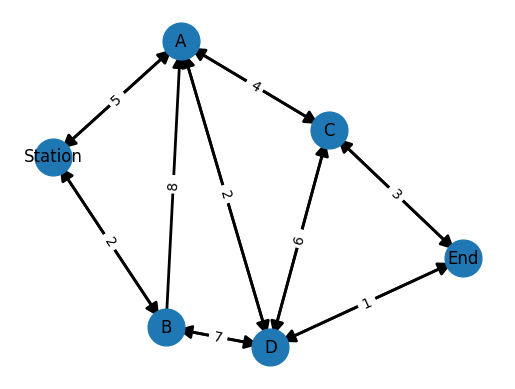

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

def display_weighted_graph(adjacency_list):
    """
    Display a graph from an adjacency list.
    
    :param adjacency_list: A dictionary representing the graph, where keys are node labels and
                           values are lists of tuples (neighbor, weight).
    """
    # Create a directed graph from adjacency list
    graph = nx.DiGraph()
    
    # Add edges to the graph
    for node, neighbors in adjacency_list.items():
        for neighbor, weight in neighbors:
            graph.add_edge(node, neighbor, weight=weight)
    
    # Draw the graph
    pos = nx.spring_layout(graph)  # positions for all nodes
    nx.draw_networkx_nodes(graph, pos, node_size=700)
    nx.draw_networkx_edges(graph, pos, width=2, arrowsize=20)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_family="sans-serif")
    
    # Draw edge labels
    edge_labels = dict([((u, v,), d['weight'])
                        for u, v, d in graph.edges(data=True)])
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Show the graph
    plt.axis('off')
    plt.show()

# Example adjacency list
adjacency_list_example = {
    'Station': [('A', 5), ('B', 2)],
    'A': [('Station', 5), ('C', 4), ('D', 2)],
    'B': [('Station', 2), ('A', 8), ('D', 7)],
    'C': [('A', 4), ('D', 6), ('End', 3)],
    'D': [('A', 2), ('B', 7), ('C', 6), ('End', 1)],
    'End': [('C', 3), ('D', 1)]
}

# Display the graph
display_weighted_graph(adjacency_list_example)


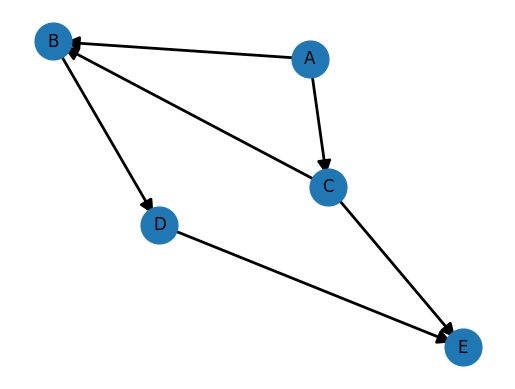

In [20]:
def display_directed_unweighted_graph(adjacency_list):
    """
    Display a directed unweighted graph from an adjacency list.
    
    :param adjacency_list: A dictionary representing the graph, where keys are node labels and
                           values are lists of neighbors.
    """
    # Create a directed graph from adjacency list
    graph = nx.DiGraph()
    
    # Add edges to the graph (since it's unweighted, no need to specify weights)
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            graph.add_edge(node, neighbor)
    
    # Draw the graph
    pos = nx.spring_layout(graph)  # positions for all nodes
    nx.draw_networkx_nodes(graph, pos, node_size=700)
    nx.draw_networkx_edges(graph, pos, width=2, arrowsize=20)
    nx.draw_networkx_labels(graph, pos, font_size=12, font_family="sans-serif")

    # Show the graph
    plt.axis('off')
    plt.show()

# Example adjacency list for a directed unweighted graph
adjacency_list_example_unweighted = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['B', 'E'],
    'D': ['E'],
    'E': []
}

# Display the directed unweighted graph
display_directed_unweighted_graph(adjacency_list_example_unweighted)


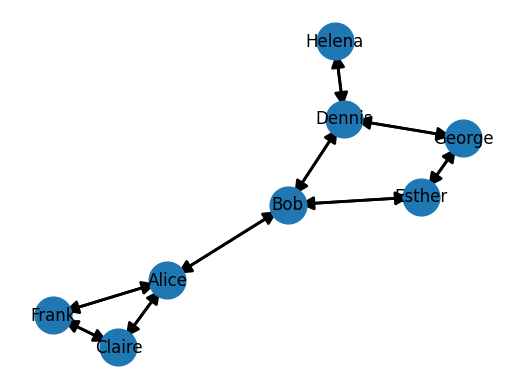

In [21]:
social_network_graph = {
    'Alice': ['Bob', 'Claire', 'Frank'],
    'Bob': ['Alice', 'Dennis', 'Esther'],
    'Claire': ['Alice', 'Frank'],
    'Dennis': ['Bob', 'George', 'Helena'],
    'Esther': ['Bob', 'George'],
    'Frank': ['Alice', 'Claire'],
    'George': ['Dennis', 'Esther'],
    'Helena': ['Dennis']
}
display_directed_unweighted_graph(social_network_graph)

### Tree Tranversal or Graph Traversal
In computer science, graph traversal is a technique for visiting every vertex in a graph, or node, in a data structure.



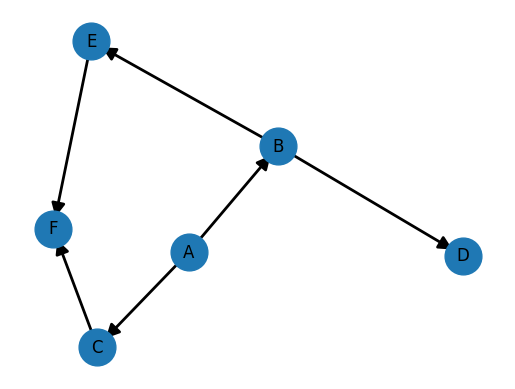

In [22]:
graph_example = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}
display_directed_unweighted_graph(graph_example)

### Depth-First Search (DFS) - Minimal Example
DFS explores as far as possible along each branch before backtracking. This is a recursive implementation.

In [23]:
def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    print(node, end=" ")
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

# Example graph represented as an adjacency list


# Perform DFS starting from node 'A'
print("DFS starting from node 'A':")
dfs(graph_example, 'A')


DFS starting from node 'A':
A B D E F C 

## Breadth-First Search (BFS) - Minimal Example
BFS explores the neighbor nodes at the current depth before moving on to the nodes at the next depth level. This implementation uses a queue.

In [24]:
from collections import deque

def bfs(graph, start):
    visited = set([start])
    queue = deque([start])
    
    while queue:
        node = queue.popleft()
        print(node, end=" ")
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

# Perform BFS starting from node 'A'
print("\nBFS starting from node 'A':")
bfs(graph_example, 'A')



BFS starting from node 'A':
A B C D E F 

### Scenario 1: Social Network Analysis (BFS)
Problem Statement: You're tasked with analyzing a social network to identify influential users. Specifically, you want to find users who are within a small degree of separation from a large portion of the network, indicating their potential as influencers.

***Application of BFS:*** Use BFS to traverse the social network graph from various starting points (users), counting the degrees of separation between users. BFS is particularly suited for this task because it explores all neighbors at a given depth before moving to the next level, efficiently mapping out user connections up to a specified degree of separation. This can help identify users who, within a few hops, connect to a significant part of the network.

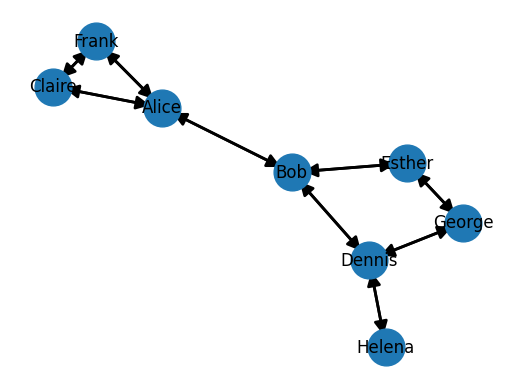

In [26]:
# Example social network graph
social_network_graph = {
    'Alice': ['Bob', 'Claire', 'Frank'],
    'Bob': ['Alice', 'Dennis', 'Esther'],
    'Claire': ['Alice', 'Frank'],
    'Dennis': ['Bob', 'George', 'Helena'],
    'Esther': ['Bob', 'George'],
    'Frank': ['Alice', 'Claire'],
    'George': ['Dennis', 'Esther'],
    'Helena': ['Dennis']
}
display_directed_unweighted_graph(social_network_graph)

In [28]:
from collections import deque

def bfs_social_network(graph, start_user, max_degree_of_separation):
    """
    Perform BFS on a social network graph to find users within a certain degree of separation from a start user.
    
    :param graph: Dictionary representing the social network graph where keys are user IDs and values are lists of connected user IDs.
    :param start_user: User ID from which to start BFS.
    :param max_degree_of_separation: Maximum degree of separation from the start user to search for.
    :return: List of users within the specified degree of separation.
    """
    visited = {start_user}
    queue = deque([(start_user, 0)])  # Queue of (user, degree)
    influential_users = []
    
    while queue:
        current_user, current_degree = queue.popleft()
        if current_degree > max_degree_of_separation:
            break  # Stop if we've reached beyond the max degree of separation
        
        influential_users.append(current_user)
        
        # Enqueue neighbors
        for neighbor in graph[current_user]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, current_degree + 1))
                
    return influential_users


start_user = 'Alice'
max_degree_of_separation = 2

influential_users = bfs_social_network(social_network_graph, start_user, max_degree_of_separation)
print(f"Users within {max_degree_of_separation} degrees of separation from {start_user}: {influential_users}")


Users within 2 degrees of separation from Alice: ['Alice', 'Bob', 'Claire', 'Frank', 'Dennis', 'Esther']


### Scenario 2: Website Crawling (DFS)
Problem Statement: As part of a project to analyze web content for a specific topic, you need to crawl websites and explore their pages deeply to catalog relevant content. The goal is to ensure thorough exploration of each domain's subsections for comprehensive content analysis.

***Application of DFS:** Implement DFS to crawl websites, diving deep into each hyperlink path before backtracking. This depth-first approach ensures that the crawler exhaustively explores each branch of a website's structure (e.g., following links from the homepage to subpages and their subpages) before moving to the next branch. DFS is ideal for this scenario because it can handle deep navigation paths typical in websites, ensuring no relevant subsection is overlooked.

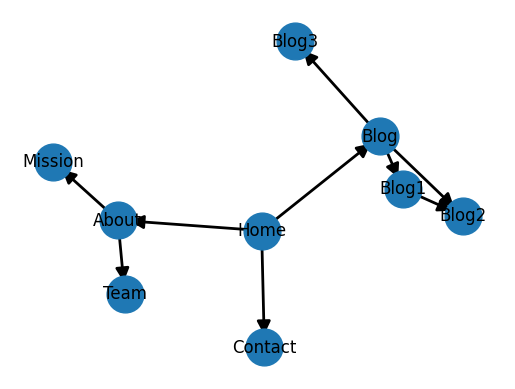

In [31]:
# Example website graph
website_graph = {
    'Home': ['About', 'Blog', 'Contact'],
    'About': ['Team', 'Mission'],
    'Blog': ['Blog1', 'Blog2', 'Blog3'],
    'Contact': [],
    'Team': [],
    'Mission': [],
    'Blog1': ['Blog2'],  # Example of a link within the blog section
    'Blog2': [],
    'Blog3': []
}
display_directed_unweighted_graph(website_graph)

In [32]:
def dfs_website_crawler(graph, start_page, visited=None, content_catalog=None):
    """
    Perform DFS on a website graph to explore pages and catalog content.
    
    :param graph: Dictionary representing the website graph where keys are page URLs and values are lists of linked page URLs.
    :param start_page: Starting page URL for the DFS crawl.
    :param visited: Set of already visited pages to avoid cycles.
    :param content_catalog: Dictionary to catalog content from each page.
    :return: None
    """
    if visited is None:
        visited = set()
    if content_catalog is None:
        content_catalog = {}

    # Simulate content extraction (here we just assign a placeholder value)
    content = "Content of " + start_page  # In real application, fetch and process the page's content

    # Catalog the content
    content_catalog[start_page] = content
    visited.add(start_page)

    # Print or log the visited page (for demonstration)
    print("Visited:", start_page)

    # Recursive DFS on linked pages
    for linked_page in graph[start_page]:
        if linked_page not in visited:
            dfs_website_crawler(graph, linked_page, visited, content_catalog)


start_page = 'Home'

content_catalog = {}
dfs_website_crawler(website_graph, start_page, content_catalog=content_catalog)

print("\nCataloged Content:")
for page, content in content_catalog.items():
    print(f"{page}: {content}")


Visited: Home
Visited: About
Visited: Team
Visited: Mission
Visited: Blog
Visited: Blog1
Visited: Blog2
Visited: Blog3
Visited: Contact

Cataloged Content:
Home: Content of Home
About: Content of About
Team: Content of Team
Mission: Content of Mission
Blog: Content of Blog
Blog1: Content of Blog1
Blog2: Content of Blog2
Blog3: Content of Blog3
Contact: Content of Contact


### Scenario 3: Recommendation Systems (BFS)
Problem Statement: For an online bookstore, you're developing a recommendation system that suggests books based on similarity to a user's recently viewed book. The system must consider not only direct similarities but also books that are similarly liked by other users, exploring connections within a "similarity graph" of books.

***Application of BFS:*** Use BFS to generate book recommendations. Starting from the node representing the user's recently viewed book, perform a BFS traversal to explore connected books (nodes) through edges representing similarities (e.g., genre, author, user ratings). BFS is appropriate here as it allows the system to explore closely related books first (direct neighbors) before moving on to books that are similarly liked by other users, providing a broad and relevant set of recommendations.

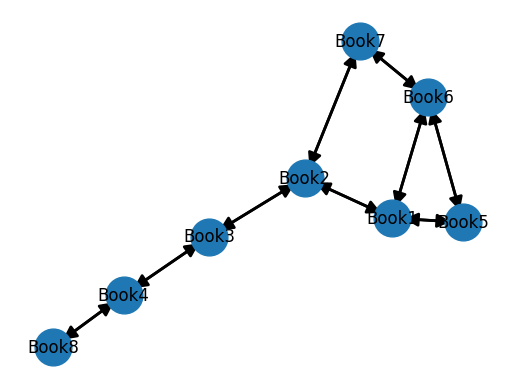

In [33]:
# Example book similarity graph
book_similarity_graph = {
    'Book1': ['Book2', 'Book5', 'Book6'],
    'Book2': ['Book1', 'Book3', 'Book7'],
    'Book3': ['Book2', 'Book4'],
    'Book4': ['Book3', 'Book8'],
    'Book5': ['Book1', 'Book6'],
    'Book6': ['Book1', 'Book5', 'Book7'],
    'Book7': ['Book2', 'Book6'],
    'Book8': ['Book4'],
}
display_directed_unweighted_graph(book_similarity_graph)

In [34]:
from collections import deque

def bfs_book_recommendations(graph, start_book, max_similarity_degree):
    """
    Perform BFS on a book similarity graph to generate book recommendations.
    
    :param graph: Dictionary representing the book similarity graph where keys are book IDs and values are lists of similar book IDs.
    :param start_book: Book ID from which to start the BFS for recommendations.
    :param max_similarity_degree: Maximum degree of similarity distance to include in the recommendations.
    :return: List of recommended book IDs.
    """
    visited = {start_book}
    queue = deque([(start_book, 0)])  # Queue of (book_id, similarity_degree)
    recommendations = []
    
    while queue:
        current_book, current_similarity_degree = queue.popleft()
        if current_similarity_degree > max_similarity_degree:
            break  # Limit recommendations to a certain degree of similarity
        
        # Skip the start_book in the final recommendations
        if current_book != start_book:
            recommendations.append(current_book)
        
        # Enqueue similar books
        for similar_book in graph[current_book]:
            if similar_book not in visited:
                visited.add(similar_book)
                queue.append((similar_book, current_similarity_degree + 1))
                
    return recommendations

start_book = 'Book1'
max_similarity_degree = 2

recommended_books = bfs_book_recommendations(book_similarity_graph, start_book, max_similarity_degree)
print(f"Recommended books based on {start_book} within similarity degree {max_similarity_degree}: {recommended_books}")


Recommended books based on Book1 within similarity degree 2: ['Book2', 'Book5', 'Book6', 'Book3', 'Book7']


### Scenario 4: Pathfinding in Logistics (DFS)
Problem Statement: A logistics company needs to plan the route for a delivery truck that must visit multiple destinations. The route must be planned in such a way that it minimizes backtracking and ensures all destinations are covered efficiently.

***Application of DFS:*** Utilize DFS to explore possible routes, starting from the depot and moving through all destinations. DFS's backtracking capability allows the exploration of all possible paths to find the most efficient route that covers all destinations with minimal repetition and backtracking. This approach is suitable for scenarios where the number of destinations is not too large, as DFS can efficiently explore all options and choose the optimal path.

KeyError: 'weight'

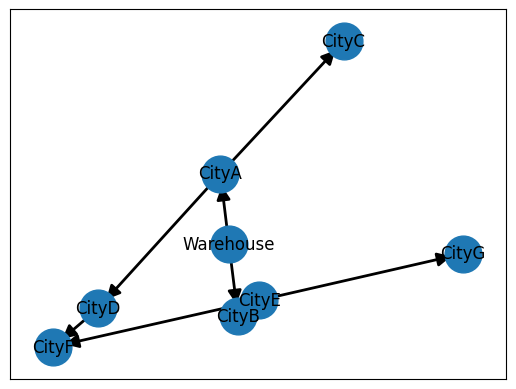

In [46]:
# Example logistics network graph with distances
logistics_network_with_distance = {
    'Warehouse': {'CityA': 100, 'CityB': 150},
    'CityA': {'CityC': 90, 'CityD': 80},
    'CityB': {'CityE': 60},
    'CityC': {},
    'CityD': {'CityF': 120},
    'CityE': {'CityF': 110, 'CityG': 70},
    'CityF': {},
    'CityG': {}
}
display_weighted(logistics_network_with_distance)

In [47]:
def dfs_logistics_with_distance(graph, start, path=None, visited=None, total_distance=0):
    """
    Use DFS to find an efficient route that visits all destinations with minimal repetition, considering distances.
    
    :param graph: Dictionary representing the logistics network, where keys are destinations and values are dictionaries of directly reachable destinations with distances.
    :param start: The starting destination for the route.
    :param path: List to keep track of the current path being explored.
    :param visited: Set of destinations that have been visited to avoid cycles.
    :param total_distance: Accumulated distance of the current path.
    :return: A tuple of the path representing an efficient route covering all destinations, and the total distance of this path.
    """
    if path is None:
        path = [start]
    if visited is None:
        visited = set([start])

    for next_destination, distance in graph[start].items():
        if next_destination not in visited:
            visited.add(next_destination)
            # Recursive call to explore further with updated total distance
            result_path, result_distance = dfs_logistics_with_distance(graph, next_destination, path + [next_destination], visited, total_distance + distance)
            
            # Optional: Choose the path with the minimum total distance if exploring alternatives
            if result_path:
                return result_path, result_distance

    # Return the path and the total distance when all destinations have been visited
    if len(visited) == len(graph):  # Check if all destinations have been covered
        return path, total_distance
    else:
        return [], 0  # If not all destinations can be reached, return empty path and 0 distance


start_destination = 'Warehouse'

efficient_route, total_distance = dfs_logistics_with_distance(logistics_network_with_distance, start_destination)
print(f"Efficient route starting from {start_destination}: {efficient_route}")
print(f"Total distance: {total_distance} units")


Efficient route starting from Warehouse: ['Warehouse', 'CityB', 'CityE', 'CityG']
Total distance: 280 units


## Scenario 5: Group Detection in Communication Networks (BFS)
Problem Statement: In a communication network, identify clusters of devices that frequently communicate with each other, indicating tightly-knit groups or communities within the network.

**Application of BFS:** Employ BFS to traverse the communication graph, starting from various nodes (devices), to identify clusters. BFS can explore the network level by level, helping to group devices based on their communication patterns. By identifying which devices are most closely connected (communicating within a few hops of each other), BFS can help highlight communication clusters, useful for network optimization or analysis of communication patterns.

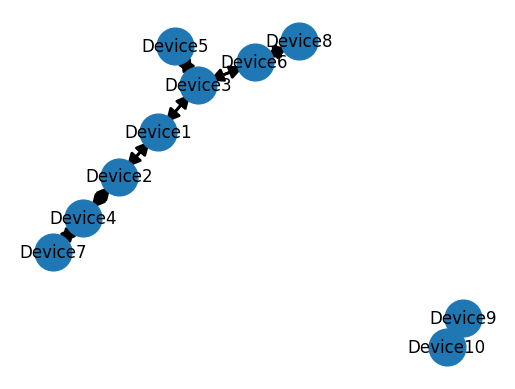

In [49]:
# Example communication network graph
communication_network = {
    'Device1': ['Device2', 'Device3'],
    'Device2': ['Device1', 'Device4'],
    'Device3': ['Device1', 'Device5', 'Device6'],
    'Device4': ['Device2', 'Device7'],
    'Device5': ['Device3'],
    'Device6': ['Device3', 'Device8'],
    'Device7': ['Device4'],
    'Device8': ['Device6'],
    # Devices 9 and 10 form a separate cluster
    'Device9': ['Device10'],
    'Device10': ['Device9']
}
display_directed_unweighted_graph(communication_network)

In [50]:
from collections import deque

def bfs_communication_clusters(graph, start_device):
    """
    Use BFS to find a cluster of devices that frequently communicate with each other, starting from a given device.
    
    :param graph: Dictionary representing the communication network, where keys are device IDs and values are lists of device IDs they directly communicate with.
    :param start_device: The device ID from which to begin the BFS.
    :return: A set of device IDs representing a communication cluster.
    """
    visited = set()
    queue = deque([start_device])

    while queue:
        current_device = queue.popleft()
        if current_device not in visited:
            visited.add(current_device)
            # Enqueue devices that have direct communication with the current device
            for neighbor in graph[current_device]:
                if neighbor not in visited:
                    queue.append(neighbor)
    return visited



# Detect clusters
clusters = []
visited_devices = set()
for device in communication_network.keys():
    if device not in visited_devices:
        cluster = bfs_communication_clusters(communication_network, device)
        clusters.append(cluster)
        visited_devices.update(cluster)

# Display the detected clusters
for i, cluster in enumerate(clusters, 1):
    print(f"Cluster {i}: {cluster}")


Cluster 1: {'Device3', 'Device6', 'Device7', 'Device2', 'Device5', 'Device1', 'Device8', 'Device4'}
Cluster 2: {'Device10', 'Device9'}


## Scenario: Wildlife Corridor Design for Habitat Connectivity
** Problem Statement:**  Wildlife conservationists are concerned about habitat fragmentation due to urban development, which isolates animal populations and increases the risk of inbreeding and local extinctions. The goal is to design wildlife corridors that connect these fragmented habitats, allowing for safe animal movements and genetic exchange between populations.

**Solution Approach Using Graph Traversal:**

In this scenario, we can model the habitats and possible corridors as a graph, where nodes represent habitat patches and edges represent potential corridors or paths that animals could use to move between these patches. The task is to find the most critical paths that would ensure connectivity between all habitat patches, potentially using the Minimum Spanning Tree (MST) algorithm to minimize the total length of corridors needed while maximizing connectivity.

While MST is not a direct application of BFS or DFS, it's a valuable graph algorithm for this context. However, we can also explore a variant using BFS to ensure connectivity and then prioritize corridors based on additional criteria like safety and feasibility.